# Layer Activation Functions
* RELU (Rectified Linear Unit)
* ELU (Exponential Linear Unit)
* SELU (Scaled Exponential Linear Unit)
* Sigmoid
* Tanh
* SoftPlus
* SoftSign
* SoftMax

### Different Ways to Call the Activation Function
The below methods are equivalent when adding a new layer using Keras
```python
# method 1 - supply activation function as parameter
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu'))

# method 2 - add activation as layer
from tensorflow.keras import layers
from tensorflow.keras import activations
model.add(layers.Dense(64))
model.add(layers.Activation(activations.relu))

# method 3 - directly call class instances
model.add(layers.Dense(64, activation=activations.relu))
```

### Dependencies

In [175]:
import numpy as np
import pandas as pd
pd.set_option('chained_assignment',None)
import matplotlib.pyplot as plt
%matplotlib inline

### Standardize the Curve Plot

In [176]:
def plot_curve(func, idx1=5, idx2=-5):
    x1 = np.linspace(-10,10,100)
    y1 = list(map(func, x1))

    x2 = np.arange(-8,9,step=1)
    y2 = list(map(func, x2))

    plt.figure(figsize=(12,4))
    plt.style.use('fivethirtyeight') # add this step to show grid
    plt.style.use('grayscale')
    _ = plt.plot(x1, y1, c='b', linewidth=2)
    _ = plt.scatter(x2, y2, c='r', alpha=1, s=100)

    plt.xticks(x2)
    plt.yticks(y2[idx1:idx2])
    plt.title(f"{func.__name__} Activation Function")

## ReLU (Rectified Linear Unit)


#### Mathematical Expression

In [177]:
%%latex
$$\begin{equation*}
a = f(x) = \left\{
        \begin{array}{ll}
            0 & \quad x \leq 0 \\
            x & \quad x > 0
        \end{array}
    \right.
\end{equation*}
$$

<IPython.core.display.Latex object>

#### Visualization with Numpy Implementation

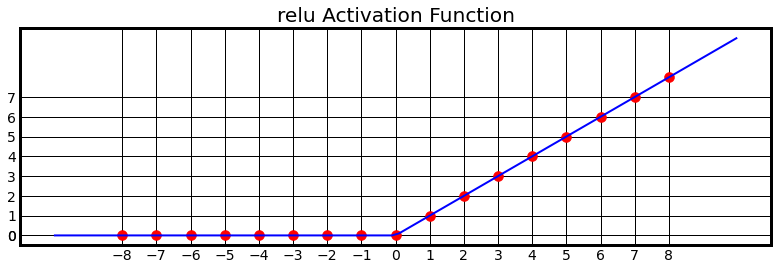

In [178]:
def relu(x):
    return max(x,0)

plot_curve(relu, 7, -1)

#### Keras Implementation
https://keras.io/api/layers/activations/#relu-function

In [179]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu'))

#### PyTorch Implementation
https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU

In [180]:
import torch
import torch.nn as nn
a = nn.ReLU()
t = torch.from_numpy(np.array([-1.0,0,1.0]))
a(t)

tensor([0., 0., 1.], dtype=torch.float64)

#### TensorFlow Implementation

## ELU (Exponential Linear Unit)

#### Mathematical Expression

In [181]:
%%latex
$$\begin{equation*}
a = f(x) = \left\{
        \begin{array}{ll}
            \alpha(e^{x}-1) & \quad x \leq 0 \\
            x & \quad x > 0
        \end{array}
    \right.
\end{equation*}
$$

<IPython.core.display.Latex object>

#### Visualization with Numpy Implementation

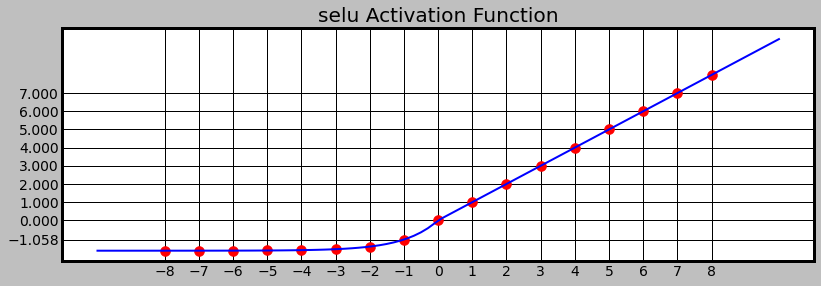

In [182]:
def selu(x):
    alpha=1.67326324
    if x > 0:
        return x
    return alpha * (np.exp(x) - 1)

plot_curve(selu, 7,-1)

#### Keras Implementation
https://keras.io/api/layers/activations/#elu-function

In [183]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='elu'))

#### PyTorch Implementation
https://pytorch.org/docs/stable/generated/torch.nn.ELU.html#torch.nn.ELU

In [184]:
import torch
import torch.nn as nn
a = nn.ELU()
t = torch.from_numpy(np.array([-1.0,0,1.0]))
a(t)

tensor([-0.6321,  0.0000,  1.0000], dtype=torch.float64)

#### TensorFlow Implementation

## SELU (Scaled Exponential Linear Unit)
where alpha and scale are pre-defined constants (alpha=1.67326324 and scale=1.05070098).

Basically, the SELU activation function multiplies scale (> 1) with the output of the tf.keras.activations.elu function to ensure a slope larger than one for positive inputs.

The values of alpha and scale are chosen so that the mean and variance of the inputs are preserved between two consecutive layers as long as the weights are initialized correctly (see tf.keras.initializers.LecunNormal initializer) and the number of input units is "large enough" (see reference paper for more information).

#### Mathematical Expression

In [185]:
%%latex
$$\begin{equation*}
a = f(x) = \left\{
        \begin{array}{ll}
            s\cdot\alpha(e^{x}-1) & \quad x \leq 0 \\
            s\cdot x & \quad x > 0
        \end{array}
    \right.
\end{equation*}
$$

<IPython.core.display.Latex object>

#### Visualization with Numpy Implementation

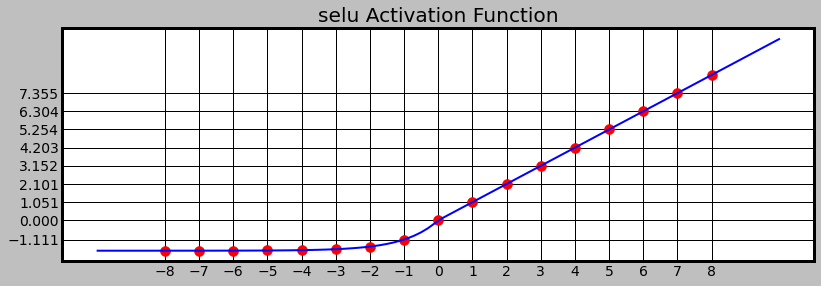

In [186]:
def selu(x):
    alpha=1.67326324
    scale=1.05070098
    if x > 0:
        return scale * x
    return scale * alpha * (np.exp(x) - 1)

plot_curve(selu, 7,-1)

#### Keras Implementation
https://keras.io/api/layers/activations/#selu-function

In [187]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='selu'))

#### PyTorch Implementation
https://pytorch.org/docs/stable/generated/torch.nn.SELU.html#torch.nn.SELU

In [188]:
import torch
import torch.nn as nn
a = nn.SELU()
t = torch.from_numpy(np.array([-1.0,0,1.0]))
a(t)

tensor([-1.1113,  0.0000,  1.0507], dtype=torch.float64)

#### TensorFlow Implementation

## Sigmoid
The Sigmoid function is that it maps anything on the real numbers line from to the open interval (0, 1) which can be interpreted as probability. 

#### Mathematical Expression

In [189]:
%%latex
$$\sigma(x)=\frac{1}{1+e^{-x}}$$

<IPython.core.display.Latex object>

#### Visualizaiton with Numpy Implementation

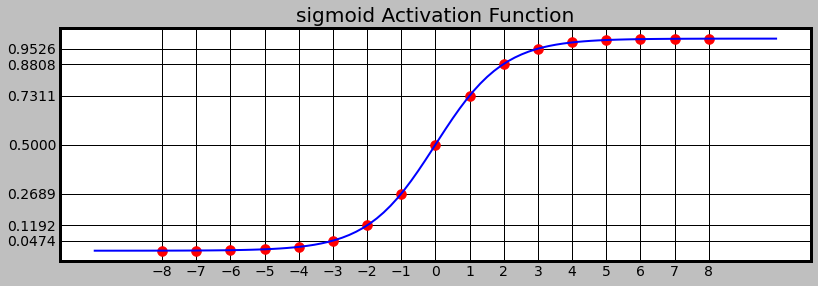

In [190]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

plot_curve(sigmoid)

In [191]:
sigmoid(10)

0.9999546021312976

In [192]:
sigmoid(-10)

4.5397868702434395e-05

#### Properties of the Sigmoid Function
* the output at 0 is always 0.5
* the output is always bounded within (0,1)
* as the input value deviates from 0, the output changes slower and slower
* sigmoid(10) ~ 0.9995 and sigmoid(-10) ~ 0.0005
* output values of multiplicative inverses are always probabilitic complements

In [193]:
%%latex
$$\sigma(x) = 1 - \sigma(-x)$$

<IPython.core.display.Latex object>

#### Keras Implementation
https://keras.io/api/layers/activations/#sigmoid-function

In [194]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='sigmoid'))

#### PyTorch Implementation
https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html

In [195]:
import torch
import torch.nn as nn
a = nn.Sigmoid()
t = torch.from_numpy(np.array([-1.0,0,1.0]))
a(t)

tensor([0.2689, 0.5000, 0.7311], dtype=torch.float64)

#### TensorFlow Implementation
* tf.sigmoid
* tf.math.sigmoid https://www.tensorflow.org/api_docs/python/tf/math/sigmoid
* tf.keras.activations.sigmoid https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid

In [196]:
import tensorflow as tf
t1 = tf.constant([-1.0], dtype=tf.float32)
t2 = tf.constant([-1.0, 0, 1.0], dtype=tf.float32)

display(tf.sigmoid(t1))
display(tf.sigmoid(t2))
display(tf.math.sigmoid(t1))
display(tf.math.sigmoid(t2))
display(tf.keras.activations.sigmoid(t1))
display(tf.keras.activations.sigmoid(t2))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.26894143], dtype=float32)>

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.26894143, 0.5       , 0.7310586 ], dtype=float32)>

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.26894143], dtype=float32)>

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.26894143, 0.5       , 0.7310586 ], dtype=float32)>

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.26894143], dtype=float32)>

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.26894143, 0.5       , 0.7310586 ], dtype=float32)>

#### TensorFlow Probability API
https://www.tensorflow.org/probability/api_docs/python/tfp/bijectors/Sigmoid

In [197]:
# needs separate install
import tensorflow_probability as tfp
a = tfp.bijectors.Sigmoid()
a(t2)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.26894143, 0.5       , 0.7310586 ], dtype=float32)>

## Tanh

#### Mathematical Expression

In [198]:
%%latex
$$tanh(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$

<IPython.core.display.Latex object>

#### Visualizaiton with Numpy Implementation

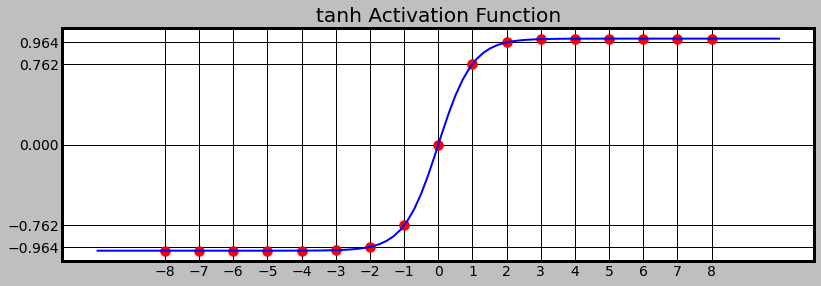

In [199]:
def tanh(x):
    return np.tanh(x)

plot_curve(tanh, 6, -6)

In [200]:
tanh(5)

0.9999092042625951

In [201]:
tanh(-5)

-0.9999092042625951

#### Properties of the Tanh Function
* The Tanh function maps the real axis to (-1,1)
* The output values are symetrically about the origin
* The output value approaches 1 and -1 quickly at small input deviation from zero

#### Keras Implementation
https://keras.io/api/layers/activations/#tanh-function

In [202]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='tanh'))

#### PyTorch Implementation
https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html#torch.nn.Tanh

In [203]:
import torch
import torch.nn as nn
a = nn.Tanh()
t = torch.from_numpy(np.array([-1.0,0,1.0]))
a(t)

tensor([-0.7616,  0.0000,  0.7616], dtype=torch.float64)

#### TensorFlow Implementation
* tf.tanh
* tf.math.tanh https://www.tensorflow.org/api_docs/python/tf/math/tanh
* tf.keras.activations.tanh https://www.tensorflow.org/api_docs/python/tf/keras/activations/tanh

In [204]:
import tensorflow as tf
t1 = tf.constant([-5], dtype=tf.float32)
t2 = tf.constant([-5, 0, 5], dtype=tf.float32)

display(tf.tanh(t1))
display(tf.tanh(t2))
display(tf.math.tanh(t1))
display(tf.math.tanh(t2))
display(tf.keras.activations.tanh(t1))
display(tf.keras.activations.tanh(t2))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.99990916], dtype=float32)>

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.99990916,  0.        ,  0.99990916], dtype=float32)>

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.99990916], dtype=float32)>

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.99990916,  0.        ,  0.99990916], dtype=float32)>

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.99990916], dtype=float32)>

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.99990916,  0.        ,  0.99990916], dtype=float32)>

## SoftPlus

#### Mathematical Expression

In [205]:
%%latex
$$a = f(x) = \log{(e^{x} + 1)}$$

<IPython.core.display.Latex object>

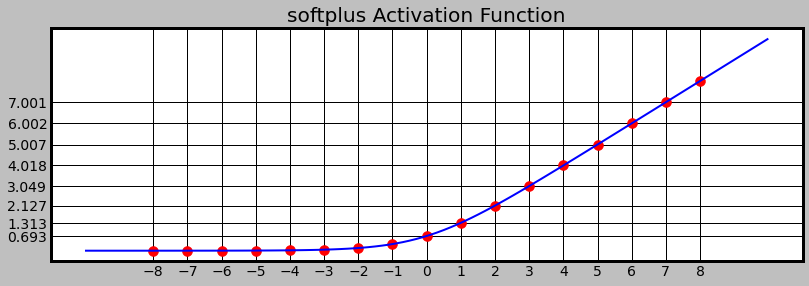

In [206]:
def softplus(x):
    return np.log(np.exp(x) + 1)

plot_curve(softplus, 8, -1)

#### Keras Implementation
https://keras.io/api/layers/activations/#softplus-function

In [207]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='softplus'))

#### PyTorch Implementation
https://pytorch.org/docs/stable/generated/torch.nn.Softplus.html#torch.nn.Softplus

In [208]:
import torch
import torch.nn as nn
a = nn.Softplus()
t = torch.from_numpy(np.array([-1.0,0,1.0]))
a(t)

tensor([0.3133, 0.6931, 1.3133], dtype=torch.float64)

#### TensorFlow Implementation

## SoftSign

#### Mathematical Expression

In [209]:
%%latex
$$a = f(x) = \frac{x}{|x|+1}$$

<IPython.core.display.Latex object>

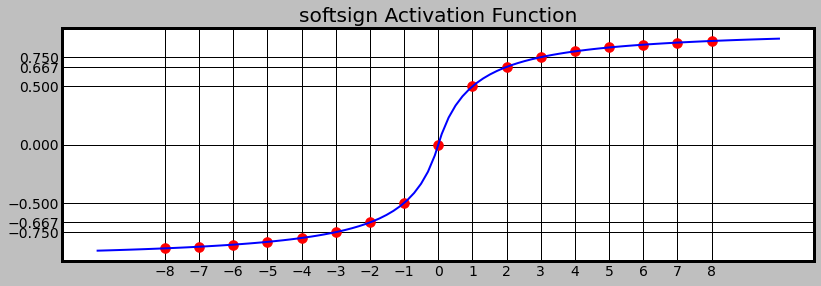

In [210]:
def softsign(x):
    return x / (np.abs(x) + 1)

plot_curve(softsign)

#### Keras Implementation
https://keras.io/api/layers/activations/#softsign-function

In [211]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='softsign'))

#### PyTorch Implementation
https://pytorch.org/docs/stable/generated/torch.nn.Softsign.html#torch.nn.Softsign

In [212]:
import torch
import torch.nn as nn
a = nn.Softsign()
t = torch.from_numpy(np.array([-1.0,0,1.0]))
a(t)

tensor([-0.5000,  0.0000,  0.5000], dtype=torch.float64)

#### TensorFlow Implementation

## SoftMax

#### Mathematical Expression

In [213]:
%%latex
$$f(x_i) = \frac{e^{x_i}}{\sum_{k=1}^{N}e^k}$$

<IPython.core.display.Latex object>

Text(0.5, 1.0, 'SoftMax Activation Function')

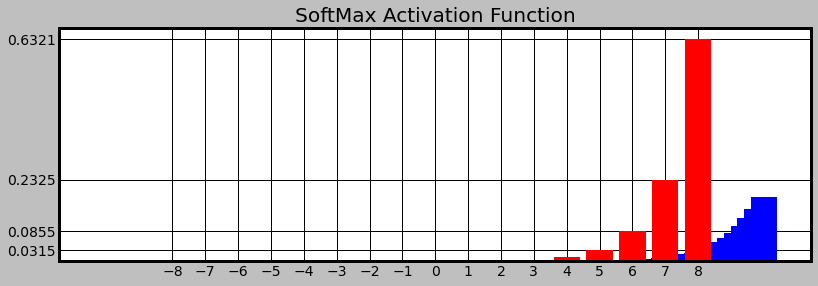

In [214]:
def softmax(x):
    return np.exp(x) / sum(np.exp(x))

x1 = np.linspace(-10,10,100)
y1 = softmax(x1)

x2 = np.arange(-8,9,step=1)
y2 = softmax(x2)

plt.figure(figsize=(12,4))
plt.style.use('grayscale')
_ = plt.bar(x1, y1, color='b')
_ = plt.bar(x2, y2, color='r')

plt.xticks(x2)
plt.yticks(y2[-4:])
plt.title("SoftMax Activation Function")

#### Properties of the SoftMax Function

#### Keras Implementation
https://keras.io/api/layers/activations/#softmax-function

In [215]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='softmax'))

#### PyTorch Implementation
https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#torch.nn.Softmax

In [216]:
import torch
import torch.nn as nn
a = nn.Softmax(dim=-1)   # NOTE that axis dimension is required, supply -1 if using array
t = torch.from_numpy(np.array([-1.0,0,1.0]))
a(t)

tensor([0.0900, 0.2447, 0.6652], dtype=torch.float64)

#### TensorFlow Implementation
* tf.nn.softmax https://www.tensorflow.org/api_docs/python/tf/nn/softmax
* tf.keras.activations.softmax https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax
* tf.keras.layers.Softmax https://www.tensorflow.org/api_docs/python/tf/keras/layers/Softmax

In [217]:
import tensorflow as tf
t1 = tf.constant([-1.0], dtype=tf.float32)
t2 = tf.constant([-1.0, 0, 1.0], dtype=tf.float32)

display(tf.nn.softmax(t1))
display(tf.nn.softmax(t2))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.09003057, 0.24472848, 0.66524094], dtype=float32)>